<a href="https://colab.research.google.com/github/hambali-020608/belajar-ml/blob/main/tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!pip install datasets
!pip install scikit-learn

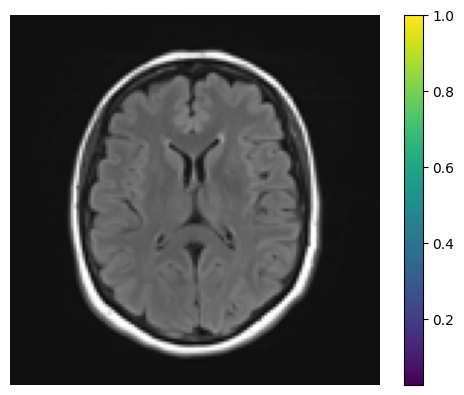

0      0
1      0
2      0
3      0
4      0
      ..
979    1
980    1
981    1
982    1
983    1
Length: 984, dtype: int64


In [54]:
from datasets import load_dataset
import pandas as pd
from PIL import Image
import io
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

TARGET_SIZE = (128, 128)

ds = load_dataset("Arunisto/brain_tumor_dataset")
def bytes_to_image(image_dict):
    image_bytes = image_dict["image_bytes"]
    image = Image.open(io.BytesIO(image_bytes))  # Konversi bytes ke gambar PIL
    image = image.resize(TARGET_SIZE)  # Ubah ukuran gambar menjadi 128x128
    image = np.array(image)  # Ubah ke NumPy array

    # Cek apakah gambar RGB atau grayscale
    if len(image.shape) == 2:  # Jika gambar grayscale, tambahkan dimensi channel
        image = np.expand_dims(image, axis=-1)  # Menambahkan channel sebagai dimensi terakhir

    # Konversi ke TensorFlow Tensor dan normalisasi
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    return image / 255.0  # Normalisasi gambar ke rentang [0, 1]

ds_train_x = [bytes_to_image(img) for img in ds["train"]]


plt.imshow(ds_train_x[0])
plt.colorbar()
plt.grid(False)
plt.axis('off')  # Menghilangkan axis
plt.show()

ds_train_y = pd.Series(ds['train']['label'])

# Mapping label ke angka
ds_train_y = ds_train_y.map({'healthy': 0, 'tumor': 1})
print(ds_train_y)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ds_train_x, ds_train_y, test_size=0.2, random_state=42)
# Memeriksa apakah ada duplikasi data
# Konversi semua ke grayscale dengan mengambil channel pertama
X_train = [x[..., 0] if x.ndim == 3 else x for x in X_train]
X_test = [x[..., 0] if x.ndim == 3 else x for x in X_test]
X_train = np.array(X_train)  # Kini shape (n_samples, 128, 128)
X_test = np.array(X_test)  # Kini shape (n_samples, 128, 128)
y_train = np.array(y_train)  # Pastikan y_train sudah di-Pandas .values


In [60]:
# buat model
from tensorflow import keras
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128,1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 57s 2s/step - accuracy: 0.7138 - loss: 0.5310 - val_accuracy: 0.8122 - val_loss: 0.4130
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 33s 277ms/step - accuracy: 0.8652 - loss: 0.3180 - val_accuracy: 0.8579 - val_loss: 0.2718
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 239ms/step - accuracy: 0.9300 - loss: 0.1903 - val_accuracy: 0.8883 - val_loss: 0.2388
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 300ms/step - accuracy: 0.9756 - loss: 0.1249 - val_accuracy: 0.9188 - val_loss: 0.2036
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 294ms/step - accuracy: 0.9833 - loss: 0.0857 - val_accuracy: 0.9239 - val_loss: 0.1714
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 251ms/step - accuracy: 0.9889 - loss: 0.0632 - val_accuracy: 0.9391 - val_loss: 0.1686
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 252ms/step - accuracy: 0.9960 - loss: 0.0398 - val_accuracy: 0.9340 - val_loss: 0.1749
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 306ms/step - accuracy: 0.9963 - loss: 0.0304 - val_accuracy: 0.9442 - val